#### Data set : https://www.kaggle.com/datasets/joyshil0599/airbnb-listing-data-for-data-science

### Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exploratory Data Analysis

In [2]:
file_path = 'airnb.csv'
df = pd.read_csv(file_path,encoding = 'utf-8').fillna(0)
columns = {'Price(in dollar)':'price',
           'Offer price(in dollar)':'offer_price',
           'Review and rating':'review_rating',
           'Number of bed':'num_bed',
           'Title':'title',
           'Detail':'detail',
           'Date':'date'}
df = df.rename(columns=columns)


#### Changing Type Of Prices

In [3]:
df['price'] = df['price'].str.replace(',', '').astype(float)
df['offer_price'] = pd.to_numeric(df['offer_price'].str.replace(',', ''), errors='coerce').fillna(0)

In [4]:
df.head(10)

,title,detail,date,price,offer_price,review_rating,num_bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.0,229.0,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.0,170.0,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.0,522.0,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.0,348.0,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.0,196.0,4.99 (222),1 queen bed
5,"Tiny home in Puerto Escondido, Mexico",Casa Tiny near Casa Wabi,Jun 21 - 26,261.0,148.0,4.84 (555),1 double bed
6,"Home in Saco, Maine, US",The Beach House. Oceanfront & Sunrise Views!,Jun 4 - 9,607.0,0.0,4.64 (90),2 queen beds
7,"Chalet in Grand Étang, Canada",• Cedar Peak • 2 Bedroom Barrier-Free Chalet,Jun 8 - 15,381.0,0.0,5.0 (48),2 beds
8,"Room in Mexico City, Mexico","Room in apartment, traditional neighborhood",Jul 3 - 8,29.0,0.0,4.84 (58),2 beds
9,"Tiny home in Sandy Valley, Nevada, US",Peacock Tiny House near Las Vegas,Jun 26 - Jul 1,154.0,0.0,4.92 (744),3 beds


#### Spliting reviews and rating and creating new columns 

In [5]:
df['review_rating'] = df['review_rating'].replace('New', 0)
df[['rating', 'reviews_number']] = df['review_rating'].str.split(' ', expand=True)
df['rating'] = pd.to_numeric(df['rating'])
df['reviews_number'] = df['reviews_number'].str.replace('(', '').str.replace(')', '').astype(float)
df[['rating', 'reviews_number']] = df[['rating', 'reviews_number']].fillna(0)
df = df.drop(columns=['review_rating'])


In [6]:
df.head(10)

,title,detail,date,price,offer_price,num_bed,rating,reviews_number
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.0,229.0,4 beds,4.85,531.0
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.0,170.0,4 beds,4.77,146.0
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.0,522.0,4 beds,4.91,515.0
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.0,348.0,5 beds,4.94,88.0
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.0,196.0,1 queen bed,4.99,222.0
5,"Tiny home in Puerto Escondido, Mexico",Casa Tiny near Casa Wabi,Jun 21 - 26,261.0,148.0,1 double bed,4.84,555.0
6,"Home in Saco, Maine, US",The Beach House. Oceanfront & Sunrise Views!,Jun 4 - 9,607.0,0.0,2 queen beds,4.64,90.0
7,"Chalet in Grand Étang, Canada",• Cedar Peak • 2 Bedroom Barrier-Free Chalet,Jun 8 - 15,381.0,0.0,2 beds,5.00,48.0
8,"Room in Mexico City, Mexico","Room in apartment, traditional neighborhood",Jul 3 - 8,29.0,0.0,2 beds,4.84,58.0
9,"Tiny home in Sandy Valley, Nevada, US",Peacock Tiny House near Las Vegas,Jun 26 - Jul 1,154.0,0.0,3 beds,4.92,744.0


#### Make new columns of date

In [16]:
df['start_date'] = df['date'].str.split('-', expand=True)[0]
df['end_length'] = df['date'].str.split('-', expand=True)[1].str.len()

def update_end_date(row):
    if row['end_length'] <= 3:
        return row['start_date'][:3] + ' ' + row['date'].split('-')[1]
    else:
        return row['date'].split('-')[1]

df['end_date'] = df.apply(update_end_date, axis=1)

df = df.drop(columns=['date','end_length'])


In [17]:
df.head(10)

,title,detail,price,offer_price,num_bed,rating,reviews_number,start_date,end_date
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,306.0,229.0,4 beds,4.85,531.0,Jun 11,Jun 16
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,485.0,170.0,4 beds,4.77,146.0,Jun 6,Jun 11
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,119.0,522.0,4 beds,4.91,515.0,Jul 9,Jul 14
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,192.0,348.0,5 beds,4.94,88.0,Jun 11,Jun 16
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,232.0,196.0,1 queen bed,4.99,222.0,Jun 4,Jun 9
5,"Tiny home in Puerto Escondido, Mexico",Casa Tiny near Casa Wabi,261.0,148.0,1 double bed,4.84,555.0,Jun 21,Jun 26
6,"Home in Saco, Maine, US",The Beach House. Oceanfront & Sunrise Views!,607.0,0.0,2 queen beds,4.64,90.0,Jun 4,Jun 9
7,"Chalet in Grand Étang, Canada",• Cedar Peak • 2 Bedroom Barrier-Free Chalet,381.0,0.0,2 beds,5.00,48.0,Jun 8,Jun 15
8,"Room in Mexico City, Mexico","Room in apartment, traditional neighborhood",29.0,0.0,2 beds,4.84,58.0,Jul 3,Jul 8
9,"Tiny home in Sandy Valley, Nevada, US",Peacock Tiny House near Las Vegas,154.0,0.0,3 beds,4.92,744.0,Jun 26,Jul 1


## Top 10 most reviewed hauses

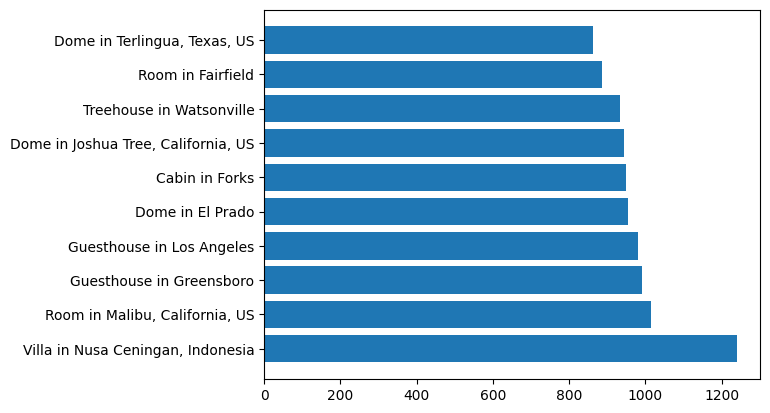

In [18]:
most_reviewed = df.sort_values(['reviews_number'],ascending=False)
fig, ax = plt.subplots()
ax.barh(most_reviewed['title'][:10],most_reviewed['reviews_number'][:10])
plt.show()

### Rating hause

In [19]:
most_rating = df.sort_values(['rating'],ascending=False)
most_rating

,title,detail,price,offer_price,num_bed,rating,reviews_number,start_date,end_date
180,"Cabin in Mineral Bluff, Georgia, US",Scenic Solitude-Amazing Mountain views on 5 acres,302.0,175.0,2 beds,5.0,44.0,Jun 4,Jun 9
846,Cabin in Weaverville,Reems Creek Mountain Cabin,237.0,0.0,2 queen beds,5.0,222.0,May 9,May 14
72,"Dome in Windermere, Canada",Cougar Dome at Winderdome Resort!,335.0,223.0,3 beds,5.0,16.0,Aug 27,Sep 1
198,"Place to stay in Hopatcong, New Jersey, US",Lake Sports Home & Super water sports!,154.0,233.0,3 beds,5.0,18.0,Aug 20,Aug 25
69,"Guesthouse in Peachland, Canada",Romantic lakefront estate with lake view & deck,271.0,0.0,2 beds,5.0,311.0,Jun 2,Jun 7
...,...,...,...,...,...,...,...,...,...
111,"Treehouse in Wardensville, West Virginia, US",Eagles Nest Treehouse w/Hot tub!,244.0,63.0,3 beds,0.0,0.0,Jun 4,Jun 10
101,"Apartment in San Juan, Puerto Rico","Villa Bohème 3, 1BR with Patio",115.0,0.0,1 bed,0.0,0.0,Jul 8,Jul 13
100,"Home in Bellingham, Washington, US",Bellingham A-Frame - Hot tub & Firepit,232.0,0.0,2 beds,0.0,0.0,Jun 11,Jun 16
98,"Guesthouse in Destin, Florida, US",New Carriage House * 1 Block to Beach * King Bed!,231.0,0.0,1 king bed,0.0,0.0,Aug 13,Aug 18


## Find the hauses which are located in US and have 5 rating



In [20]:
us_hauses = df[df['title'].str.contains('US',regex=True)].sort_values(['rating'],ascending=False)
us_hauses.query('rating == 5')


,title,detail,price,offer_price,num_bed,rating,reviews_number,start_date,end_date
96,"Boat in Key West, Florida, US",Cozy Houseboat “Wild One”,233.0,0.0,2 beds,5.0,4.0,Jun 11,Jun 16
239,"Villa in Morongo Valley, California, US",Pink Galaxy | Private Observatory · Hot Tub · ...,283.0,192.0,1 queen bed,5.0,9.0,Jun 7,Jun 12
64,"Tent in Island Park, Idaho, US","Yellowstone Luxury Tent; sleeps 3, 1 king +1 f...",224.0,0.0,2 queen beds,5.0,31.0,Jun 15,Jun 20
90,"Dome in Whittier, North Carolina, US",Luxury Dome w/ Hot Tub & Mountain View,291.0,169.0,2 beds,5.0,11.0,Aug 7,Aug 12
117,"Cabin in Marion, North Carolina, US","Luxury Treehouse, Romantic, Views, Hike-Waterfall",228.0,0.0,1 bed,5.0,18.0,Jul 29,Aug 3
180,"Cabin in Mineral Bluff, Georgia, US",Scenic Solitude-Amazing Mountain views on 5 acres,302.0,175.0,2 beds,5.0,44.0,Jun 4,Jun 9
198,"Place to stay in Hopatcong, New Jersey, US",Lake Sports Home & Super water sports!,154.0,233.0,3 beds,5.0,18.0,Aug 20,Aug 25
150,"Farm stay in Siler City, North Carolina, US",Lovely farm cabin experience,114.0,0.0,2 beds,5.0,5.0,Jun 11,Jun 16
152,"Camper/RV in Ashford, Washington, US",The Alpine Airstream at Mt. Rainier with Hot Tub,286.0,0.0,1 queen bed,5.0,11.0,Jun 11,Jun 16
35,"Dome in Sandgate, Vermont, US",“Whimsical Stone Abode” - Boston Magazine,301.0,0.0,1 queen bed,5.0,244.0,Jun 6,Jun 11


### How many houses meet these conditions?

In [21]:
us_hauses.query('rating == 5')

,title,detail,price,offer_price,num_bed,rating,reviews_number,start_date,end_date
96,"Boat in Key West, Florida, US",Cozy Houseboat “Wild One”,233.0,0.0,2 beds,5.0,4.0,Jun 11,Jun 16
239,"Villa in Morongo Valley, California, US",Pink Galaxy | Private Observatory · Hot Tub · ...,283.0,192.0,1 queen bed,5.0,9.0,Jun 7,Jun 12
64,"Tent in Island Park, Idaho, US","Yellowstone Luxury Tent; sleeps 3, 1 king +1 f...",224.0,0.0,2 queen beds,5.0,31.0,Jun 15,Jun 20
90,"Dome in Whittier, North Carolina, US",Luxury Dome w/ Hot Tub & Mountain View,291.0,169.0,2 beds,5.0,11.0,Aug 7,Aug 12
117,"Cabin in Marion, North Carolina, US","Luxury Treehouse, Romantic, Views, Hike-Waterfall",228.0,0.0,1 bed,5.0,18.0,Jul 29,Aug 3
180,"Cabin in Mineral Bluff, Georgia, US",Scenic Solitude-Amazing Mountain views on 5 acres,302.0,175.0,2 beds,5.0,44.0,Jun 4,Jun 9
198,"Place to stay in Hopatcong, New Jersey, US",Lake Sports Home & Super water sports!,154.0,233.0,3 beds,5.0,18.0,Aug 20,Aug 25
150,"Farm stay in Siler City, North Carolina, US",Lovely farm cabin experience,114.0,0.0,2 beds,5.0,5.0,Jun 11,Jun 16
152,"Camper/RV in Ashford, Washington, US",The Alpine Airstream at Mt. Rainier with Hot Tub,286.0,0.0,1 queen bed,5.0,11.0,Jun 11,Jun 16
35,"Dome in Sandgate, Vermont, US",“Whimsical Stone Abode” - Boston Magazine,301.0,0.0,1 queen bed,5.0,244.0,Jun 6,Jun 11


### where is the house which has cheepest price, but high rating

In [22]:
df.sort_values(['price','rating']).nlargest(1,'rating')[['title','price','rating']]

,title,price,rating
696,"Room in Kecamatan Ubud, Indonesia",29.0,5.0


### Average price of houses by beds

In [23]:
df.groupby(['num_bed']).agg({'price':'mean'})

,price
num_bed,
1 bed,158.550000
1 bunk bed,98.333333
1 double bed,167.436364
1 king bed,157.425287
1 queen bed,160.542857
1 sofa bed,97.000000
10 beds,222.000000
11 beds,469.000000
13 beds,209.000000


### 10 hause location  which have highest price

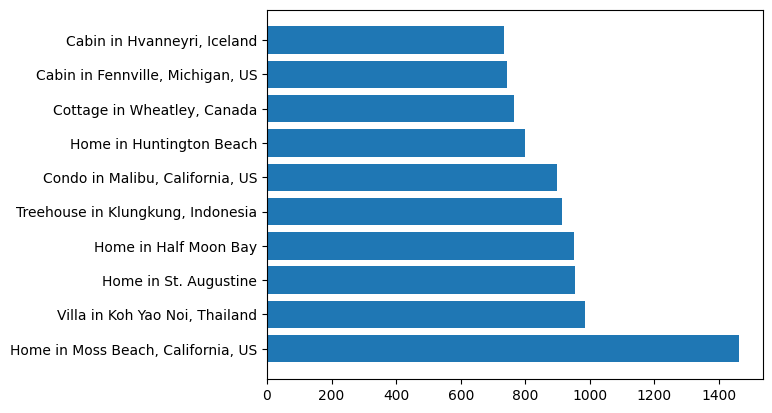

In [32]:
hauses = df.sort_values(['price'],ascending=False)
fig, ax = plt.subplots()
ax.barh(hauses['title'][:10],hauses['price'][:10])
plt.show()

In [33]:
df

,title,detail,price,offer_price,num_bed,rating,reviews_number,start_date,end_date
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,306.0,229.0,4 beds,4.85,531.0,Jun 11,Jun 16
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,485.0,170.0,4 beds,4.77,146.0,Jun 6,Jun 11
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,119.0,522.0,4 beds,4.91,515.0,Jul 9,Jul 14
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,192.0,348.0,5 beds,4.94,88.0,Jun 11,Jun 16
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,232.0,196.0,1 queen bed,4.99,222.0,Jun 4,Jun 9
...,...,...,...,...,...,...,...,...,...
948,Guest suite in Lake Worth,The Garden Suite at the Historic Chateau Bleu,141.0,0.0,1 king bed,4.85,82.0,May 1,May 6
949,Room in Kissimmee,Private Room in Orlando/Kissimmee (2Twins) T1,43.0,0.0,1 king bed,4.90,300.0,May 1,May 6
950,Guesthouse in San Antonio,Casa Alexander,73.0,0.0,5 beds,4.92,282.0,May 1,May 6
951,Apartment in Englewood,BEACH FRONT Unit w/ Pool Sandy Toe's # 5,233.0,0.0,4 beds,4.96,318.0,May 7,May 12


### Cheapest hause which has high rating and 4 beds

In [36]:
df[df['num_bed'].str.contains('4')].sort_values(['price','rating']).nlargest(1,'rating')[['title','price','rating']]

,title,price,rating
430,"Condo in Roviano, Italy",61.0,5.0


###  Avarage price by US states cities

In [46]:
df['city'] = df[df['title'].str.contains('US')]['title'].str.split(',',expand=True)[1]
df['city'] = df['city'].fillna('not in us')
df.groupby(['city']).agg({'price':'mean'})

,price
city,
California,366.708333
Florida,210.464286
Georgia,212.333333
Hawaii,172.142857
Idaho,224.000000
Maine,320.333333
Maryland,291.000000
Michigan,743.000000
Missouri,133.000000
